# 백화점 데이터 다루기

***
## Import Module
***

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False



***
## Set Data
***

In [2]:

df = pd.read_csv("C:\\Users\\ASIAE_24\\Documents\\data\\X_train.csv", encoding='cp949')
df
#dft = pd.read_csv("X_train.csv", encoding = 'cp949')
#df = pd.concat([dft, df], ignore_index=True)


custid         date_time store        product  brand   corner  \
0             0  2000-06-25 12:12   무역점  2116050008000  에스티로더  수입종합화장품   
1             0  2000-06-25 12:42   무역점  4125440008000    시슬리  수입종합화장품   
2             0  2000-08-26 18:10    본점  2116052008000   크리니크  수입종합화장품   
3             0  2000-08-26 18:30    본점  4106430119900     듀퐁     수입의류   
4             0  2000-09-03 18:02   무역점  2139141008000     랑콤  수입종합화장품   
...         ...               ...   ...            ...    ...      ...   
1036648   29998  2001-01-21 13:20   무역점  4241080013074    바닐라     영캐주얼   
1036649   29998  2001-04-07 16:33   무역점  2139141008000     랑콤  수입종합화장품   
1036650   29999  2001-03-21 18:03   천호점  4109290004000  루이까또즈      핸드백   
1036651   29999  2001-03-29 18:23   천호점  4139350206500  소피에르핀      넥타이   
1036652   29999  2001-04-21 13:13   천호점  4104840008000     샤넬  수입종합화장품   

              pc   part  imported  amount  discount  installment  
0            화장품   명품잡화         1   90000      9000            3  
1            화장품   명품잡화         1   39000      3900            1  
2            화장품   잡화파트         1  175000     17500            3  
3           명품토탈   잡화파트         1  455000     45500            3  
4            화장품   명품잡화         0  100000     10000            3  
...          ...    ...       ...     ...       ...          ...  
1036648  트랜디 케쥬얼  여성캐주얼         0  120000         0            3  
1036649      화장품   명품잡화         0   38000      1900            1  
1036650      핸드백     잡화         0   46000      2300            1  
1036651       셔츠   남성의류         0   49000      2450            1  
1036652      화장품     잡화         1   52000      2600            1  

[1036653 rows x 12 columns]

***
## 고객 별 사용 금액
***

In [4]:

df1 = df[['custid','amount']]
# custid 를 그룹으로 합산
df1.groupby('custid').sum()


amount
custid         
0       1742000
1       2772100
2       3750850
3       2300500
4       1045000
...         ...
49990    213000
49991    770080
49992    221000
49993    143029
49994    159200

[49995 rows x 1 columns]

***
## 브랜드 갯수
***

In [5]:

df2 = df['brand']
df2 = df2.drop_duplicates()
df2 = df2.reset_index(drop=True)
df2


0        에스티로더
1          시슬리
2         크리니크
3           듀퐁
4           랑콤
         ...  
1901       라씰로
1902      씽크핑크
1903       엘피노
1904    세화종합상행
1905      케릭터인
Name: brand, Length: 1906, dtype: object

***
## 고객별 매장 방문 횟수
***

> 매장 방문 횟수를 따지기 위해 시간정보 제거<br>
> 하루에 거래기록이 여러번 있어도 한번만 카운트 하기 위함

In [3]:
df3 = df[['custid', 'date_time', 'store']]
data = []
for i, j in zip(df3['date_time'], range(len(df3))):
    data.append(i[:10])
data = pd.Series(data)
df3['date'] = data
df3 = df3.drop(['date_time'], axis=1)
df3


<ipython-input-3-efd380354c34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = data


custid store        date
0             0   무역점  2000-06-25
1             0   무역점  2000-06-25
2             0    본점  2000-08-26
3             0    본점  2000-08-26
4             0   무역점  2000-09-03
...         ...   ...         ...
1036648   29998   무역점  2001-01-21
1036649   29998   무역점  2001-04-07
1036650   29999   천호점  2001-03-21
1036651   29999   천호점  2001-03-29
1036652   29999   천호점  2001-04-21

[1036653 rows x 3 columns]

In [22]:
from datetime import datetime

In [26]:
date_object = datetime.strptime(df3['date'].loc[1], '%Y-%m-%d').date()
print(date_object.weekday())

6


In [28]:
date_day = []
for i in df3['date']:
    date_object = datetime.strptime(i, '%Y-%m-%d').date()
    date_day.append(date_object.weekday())


In [29]:
date_day

[6,
 6,
 5,
 5,
 6,
 6,
 6,
 2,
 4,
 4,
 0,
 5,
 5,
 5,
 5,
 6,
 4,
 5,
 5,
 2,
 4,
 4,
 2,
 3,
 5,
 3,
 3,
 6,
 2,
 2,
 2,
 5,
 4,
 4,
 6,
 6,
 5,
 6,
 6,
 6,
 2,
 4,
 2,
 2,
 6,
 4,
 2,
 2,
 5,
 5,
 3,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 6,
 0,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 6,
 6,
 5,
 5,
 5,
 0,
 3,
 3,
 3,
 6,
 3,
 3,
 6,
 3,
 3,
 4,
 4,
 4,
 0,
 4,
 4,
 1,
 3,
 3,
 3,
 5,
 0,
 4,
 4,
 6,
 3,
 3,
 3,
 4,
 4,
 2,
 3,
 5,
 6,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 6,
 6,
 3,
 3,
 0,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 4,
 2,
 2,
 2,
 2,
 6,
 6,
 6,
 6,
 2,
 4,
 5,
 4,
 0,
 0,
 0,
 5,
 0,
 0,
 1,
 5,
 5,
 0,
 4,
 4,
 5,
 5,
 2,
 1,
 4,
 4,
 0,
 2,
 2,
 2,
 4,
 1,
 1,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 5,
 5,
 5,
 6,
 5,
 6,
 6,
 2,
 6,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 1,
 3,
 3,
 4,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 5,
 5,
 5,
 5,
 5,
 2,
 4,
 0,
 4,
 4,
 5,
 5,
 2,
 3,
 3,
 0,
 1,
 3,
 0,
 2,
 2,
 2,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 2,
 6,
 6,


In [8]:
df3.groupby(['custid', 'store']).count()

date
custid store      
0      무역점       5
       본점        6
1      무역점       4
       본점       22
2      무역점       8
...            ...
49991  신촌점      10
49992  본점        2
49993  신촌점       4
49994  무역점       1
       본점        2

[83039 rows x 1 columns]

***
## 점포별 환불한 상품종류 빈도수
***

> amount가 -인 row를 찾아 반품이라고 판단<br>
> corner별 store별로 count 후 내림차순 정렬

In [9]:
df4 = df[['store', 'corner', 'amount']]
df4

store   corner  amount
0         무역점  수입종합화장품   90000
1         무역점  수입종합화장품   39000
2          본점  수입종합화장품  175000
3          본점     수입의류  455000
4         무역점  수입종합화장품  100000
...       ...      ...     ...
1726425   신촌점       아동   20000
1726426   신촌점       향수   70000
1726427    본점     영트랜드   39000
1726428    본점     진케주얼   34200
1726429   무역점  수입종합화장품   86000

[1726430 rows x 3 columns]

In [10]:
is_return = df4['amount'] <0
df4 = df4[is_return]
df4

store   corner   amount
18         본점      란제리   -35000
21         본점     영트랜드   -73000
39        무역점    트래디셔널  -434500
46        무역점     가전특정 -1416000
60        천호점     영캐쥬얼   -74600
...       ...      ...      ...
1726286   신촌점       아동  -261000
1726287   신촌점  칼라드래디셔널  -308000
1726326   신촌점  뉴베이직캐주얼  -200000
1726359   무역점      아동복   -98000
1726360   무역점      아동복  -205000

[115941 rows x 3 columns]

In [11]:
df4 = df4.groupby(['corner', 'store']).count().sort_values(by=['amount'], axis=0, ascending=False)
df4

amount
corner  store        
영트랜드    본점       2974
영캐주얼    무역점      2782
캐릭터     무역점      2694
영캐주얼    신촌점      2665
수입종합화장품 본점       2629
...               ...
오디오     본점          1
인스탄트식품  천호점         1
        신촌점         1
피혁      무역점         1
인스턴트식품  무역점         1

[509 rows x 1 columns]

# 파트별로 탑 5 브랜드 그래프 (거래 횟수 기준)

In [18]:
df = pd.read_csv('X_train.csv', encoding='cp949')

In [19]:
part_list = df['part'].drop_duplicates()
part_list = part_list.to_list()
part_list

['명품잡화',
 '잡화파트',
 '남성의류',
 '골프/유니캐쥬얼',
 '로얄부띠끄',
 '케주얼,구두,아동',
 '여성캐주얼',
 '여성의류파트',
 '가정용품',
 '가정용품파트',
 '남성정장스포츠',
 '아동',
 '잡화',
 '영어덜트캐쥬얼',
 '영라이브',
 '공산품',
 '스포츠캐쥬얼',
 '여성정장',
 '아동문화',
 '공산품파트',
 '생식품파트',
 '영플라자',
 '생식품',
 '패션잡화',
 '아동,스포츠',
 '로얄부틱',
 '여성캐쥬얼',
 '스포츠캐주얼',
 '영캐릭터',
 '상품개발영업1과',
 '인터넷백화점']

In [20]:
is_return = df['amount'] > 0
df5 = df[is_return]
df5 = df5[['brand', 'part', 'amount']]
df5

brand   part  amount
0        에스티로더   명품잡화   90000
1          시슬리   명품잡화   39000
2         크리니크   잡화파트  175000
3           듀퐁   잡화파트  455000
4           랑콤   명품잡화  100000
...        ...    ...     ...
1036648    바닐라  여성캐주얼  120000
1036649     랑콤   명품잡화   38000
1036650  루이까또즈     잡화   46000
1036651  소피에르핀   남성의류   49000
1036652     샤넬     잡화   52000

[967454 rows x 3 columns]

In [22]:
df6 = df5.groupby(['part', 'brand']).count().sort_values(by=['amount'], axis=0, ascending=False)


amount
part  brand            
공산품   식품          94118
생식품   식품          63028
공산품파트 식품          42817
생식품파트 식품          32997
잡화파트  샤넬           4439
...                 ...
명품잡화  진송카르타모피소품       1
      지오수입의류          1
      지앤지             1
      조이너스            1
가정용품  캔디시             1

[3652 rows x 1 columns]

In [12]:
tmp = df6.loc['잡화파트'].head(5)
tmp
temp = tmp.index.tolist()
temp

['샤넬', '아베다', '랑콤', '에스티로더', '크리스챤디올화장품']

In [14]:
brand_list = []
for i,j in zip(range(len(part_list)),part_list):
    tmp = df6.loc[j].head(5)
    brand_list.append(tmp)
brand_list

[           amount
 brand            
 랑콤           3643
 에스티로더        3265
 크리니크         2832
 크리스챤디올화장품    2765
 아베다          2359,
            amount
 brand            
 샤넬           4439
 아베다          3433
 랑콤           3364
 에스티로더        2979
 크리스챤디올화장품    2485,
          amount
 brand          
 닥스         1997
 피에르가르뎅     1908
 입생로랑(캐)    1357
 카운테스마라     1237
 니나리찌       1189,
          amount
 brand          
 지오다노       4199
 폴로         2760
 빈폴         1223
 1492마일즈     925
 퀵실버         887,
             amount
 brand             
 버버리            861
 막스앤스펜서수입의류     767
 에뜨로            644
 막스마라           406
 지아니베르사체        379,
        amount
 brand        
 지오다노     4233
 폴로       3275
 쇼콜라      1416
 NUK      1398
 빈폴       1225,
           amount
 brand           
 밀라노스토리무역    1250
 시스템         1179
 비너스         1173
 비비안         1163
 베네통         1026,
        amount
 brand        
 마인       1128
 타임       1083
 랄프로렌      756
 아이잗바바     577
 오일릴리      558,
        amou

            amount
count     5.000000
mean   2972.800000
std     493.534396
min    2359.000000
25%    2765.000000
50%    2832.000000
75%    3265.000000
max    3643.000000


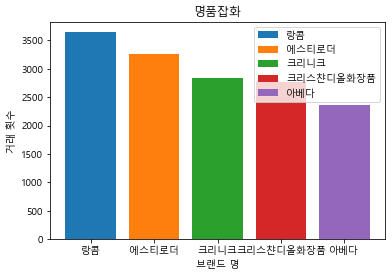

            amount
count     5.000000
mean   3340.000000
std     720.827996
min    2485.000000
25%    2979.000000
50%    3364.000000
75%    3433.000000
max    4439.000000


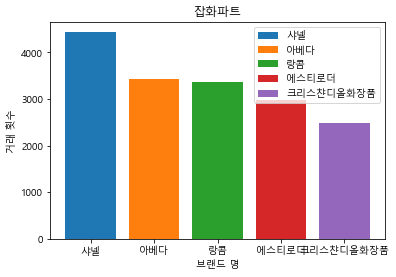

            amount
count     5.000000
mean   1537.600000
std     384.949088
min    1189.000000
25%    1237.000000
50%    1357.000000
75%    1908.000000
max    1997.000000


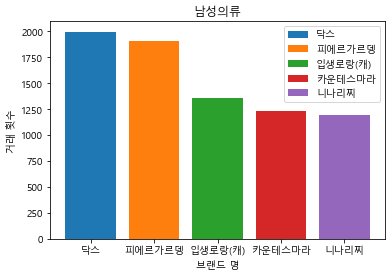

            amount
count     5.000000
mean   1998.800000
std    1450.113513
min     887.000000
25%     925.000000
50%    1223.000000
75%    2760.000000
max    4199.000000


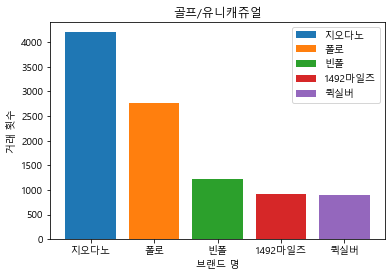

           amount
count    5.000000
mean   611.400000
std    214.343883
min    379.000000
25%    406.000000
50%    644.000000
75%    767.000000
max    861.000000


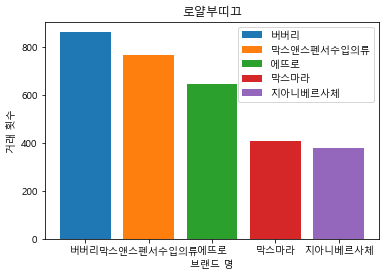

            amount
count     5.000000
mean   2309.400000
std    1363.575924
min    1225.000000
25%    1398.000000
50%    1416.000000
75%    3275.000000
max    4233.000000


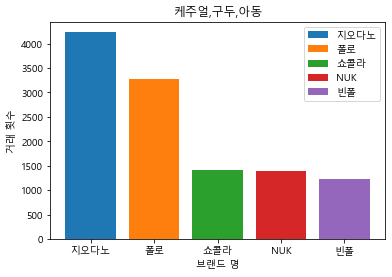

            amount
count     5.000000
mean   1158.200000
std      81.515029
min    1026.000000
25%    1163.000000
50%    1173.000000
75%    1179.000000
max    1250.000000


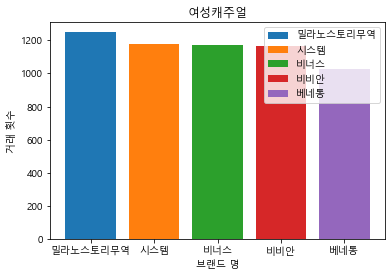

            amount
count     5.000000
mean    820.400000
std     271.947238
min     558.000000
25%     577.000000
50%     756.000000
75%    1083.000000
max    1128.000000


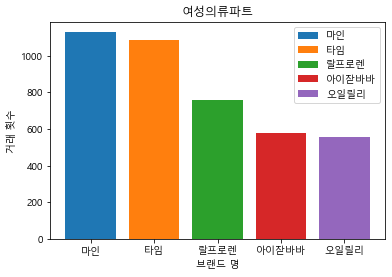

            amount
count     5.000000
mean    928.400000
std     284.694222
min     708.000000
25%     746.000000
50%     796.000000
75%     994.000000
max    1398.000000


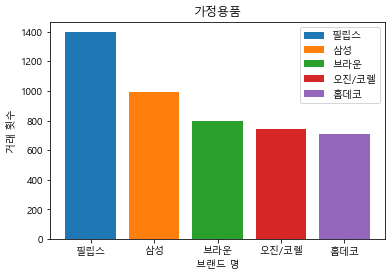

           amount
count    5.000000
mean   508.800000
std     74.643821
min    433.000000
25%    446.000000
50%    491.000000
75%    582.000000
max    592.000000


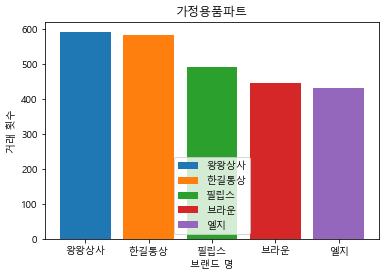

           amount
count    5.000000
mean   698.000000
std    125.825276
min    621.000000
25%    631.000000
50%    636.000000
75%    683.000000
max    919.000000


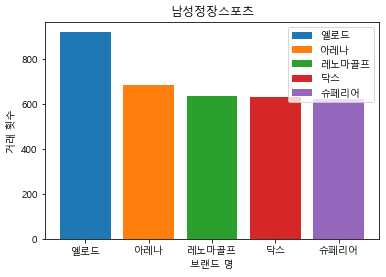

           amount
count    5.000000
mean   721.200000
std    145.140277
min    547.000000
25%    642.000000
50%    693.000000
75%    802.000000
max    922.000000


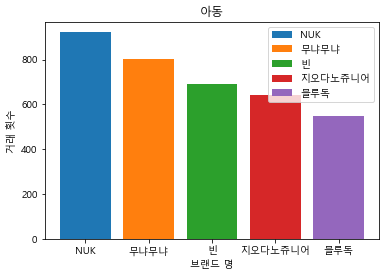

            amount
count     5.000000
mean   2119.200000
std     377.222348
min    1550.000000
25%    2136.000000
50%    2137.000000
75%    2161.000000
max    2612.000000


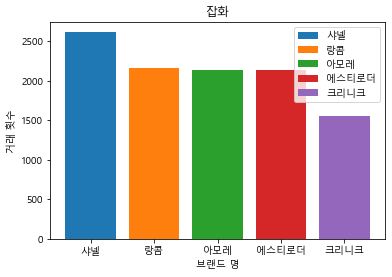

           amount
count    5.000000
mean   537.000000
std    164.865096
min    379.000000
25%    419.000000
50%    473.000000
75%    644.000000
max    770.000000


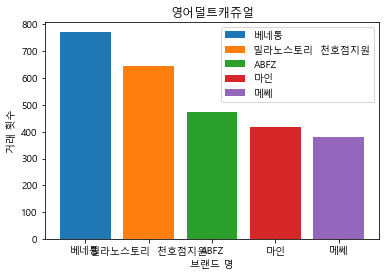

            amount
count     5.000000
mean   1378.400000
std    1310.998017
min     571.000000
25%     633.000000
50%     633.000000
75%    1416.000000
max    3639.000000


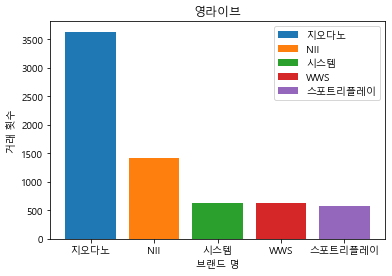

             amount
count      2.000000
mean   47083.000000
std    66517.534906
min       48.000000
25%    23565.500000
50%    47083.000000
75%    70600.500000
max    94118.000000


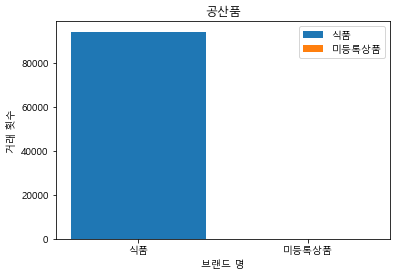

            amount
count     5.000000
mean    806.800000
std     427.325637
min     365.000000
25%     457.000000
50%     721.000000
75%    1144.000000
max    1347.000000


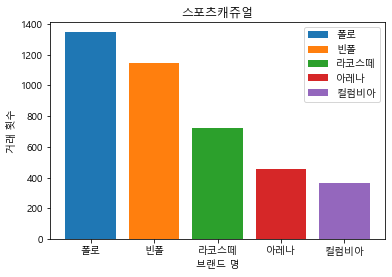

            amount
count     5.000000
mean    805.000000
std     195.290809
min     567.000000
25%     705.000000
50%     767.000000
75%     910.000000
max    1076.000000


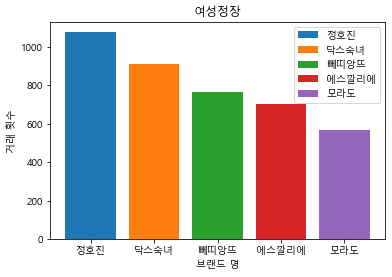

            amount
count     5.000000
mean    864.600000
std     226.775881
min     672.000000
25%     739.000000
50%     799.000000
75%     863.000000
max    1250.000000


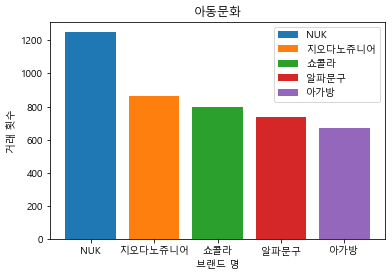

            amount
count      2.00000
mean   21410.00000
std    30274.06973
min        3.00000
25%    10706.50000
50%    21410.00000
75%    32113.50000
max    42817.00000


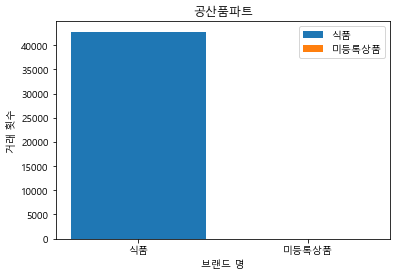

        amount
count      1.0
mean   32997.0
std        NaN
min    32997.0
25%    32997.0
50%    32997.0
75%    32997.0
max    32997.0


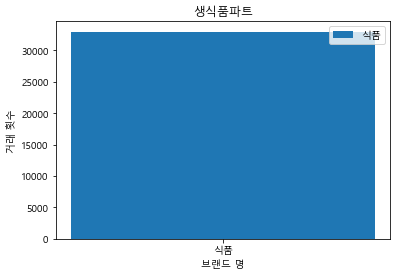

            amount
count     5.000000
mean   1778.600000
std    1244.392342
min     875.000000
25%    1194.000000
50%    1315.000000
75%    1547.000000
max    3962.000000


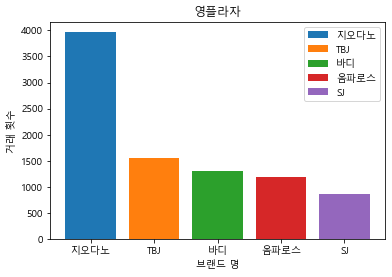

             amount
count      2.000000
mean   31515.500000
std    44565.404884
min        3.000000
25%    15759.250000
50%    31515.500000
75%    47271.750000
max    63028.000000


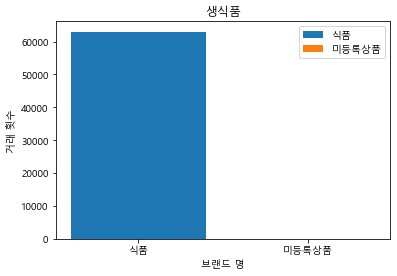

            amount
count     5.000000
mean   2945.400000
std     385.909057
min    2356.000000
25%    2854.000000
50%    3050.000000
75%    3056.000000
max    3411.000000


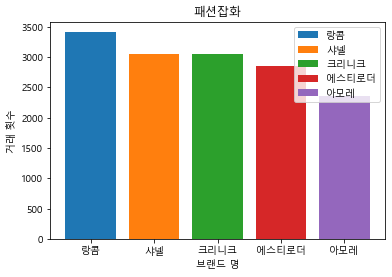

            amount
count     5.000000
mean    918.800000
std     177.993539
min     775.000000
25%     788.000000
50%     854.000000
75%     972.000000
max    1205.000000


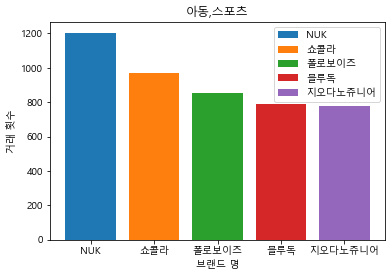

           amount
count    5.000000
mean   315.000000
std    189.070093
min    181.000000
25%    200.000000
50%    252.000000
75%    299.000000
max    643.000000


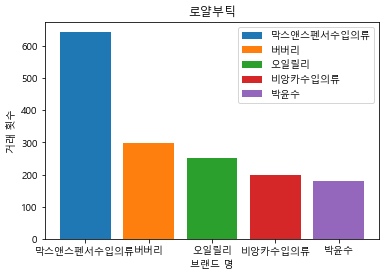

           amount
count    5.000000
mean   496.400000
std     85.658041
min    403.000000
25%    404.000000
50%    542.000000
75%    557.000000
max    576.000000


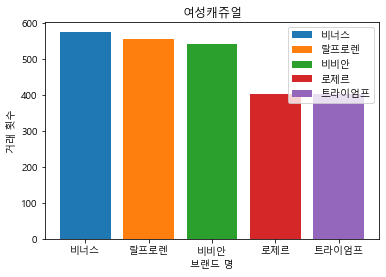

            amount
count     5.000000
mean    854.800000
std     544.294681
min     456.000000
25%     470.000000
50%     498.000000
75%    1201.000000
max    1649.000000


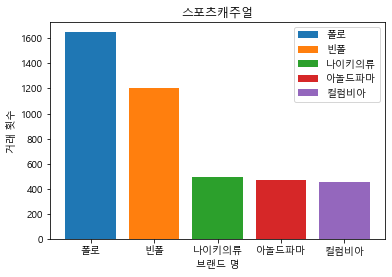

           amount
count    5.000000
mean   608.200000
std    170.606858
min    455.000000
25%    474.000000
50%    601.000000
75%    630.000000
max    881.000000


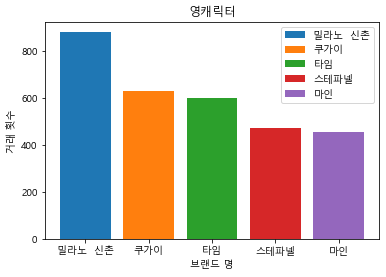

       amount
count     1.0
mean      1.0
std       NaN
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0


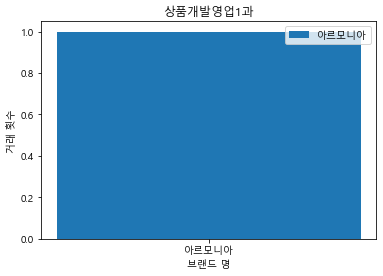

       amount
count     1.0
mean      1.0
std       NaN
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0


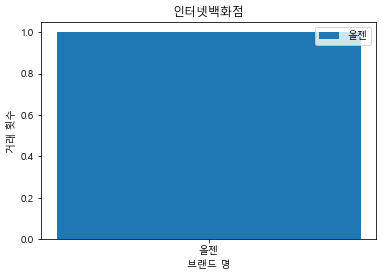

In [15]:
for i,j in zip(brand_list, part_list):
    print(i.describe())
    x = i.index.tolist()
    y = i['amount'].tolist()
    for k in range(len(i)):
        plt.bar(x[k], y[k], label=x[k])
    plt.title(j)
    plt.xlabel('브랜드 명')
    plt.ylabel('거래 횟수')
    plt.legend()
    plt.show()

In [29]:
df[df['brand'] == '식품']

custid         date_time store        product brand corner     pc  \
50            3  2000-06-01 18:10   천호점  2700000000000    식품   즉석조리   조리식품   
51            3  2000-07-16 12:20   천호점  2700000000000    식품   즉석조리   조리식품   
64            3  2000-09-01 18:50   천호점  2700000000000    식품  미확인코너   조리식품   
92            5  2000-07-21 17:10    본점  2700000000000    식품   냉장식품   일반식품   
96            5  2000-08-31 11:10    본점  2700000000000    식품     정육    축산물   
...         ...               ...   ...            ...   ...    ...    ...   
1036623   29997  2001-03-16 13:30    본점  2700000000000    식품   가정잡화   생활용품   
1036630   29997  2001-04-07 17:30   무역점  2700000000000    식품   용기보증   쇼핑보증   
1036633   29997  2001-04-15 17:30   무역점  2700000000000    식품   용기보증   쇼핑보증   
1036634   29997  2001-04-25 15:10    본점  2700000000000    식품   용기보증  미확인pc   
1036636   29997  2001-04-28 15:30   무역점  2700000000000    식품   용기보증   쇼핑보증   

          part  imported  amount  discount  installment  
50         공산품         0    4200         0            1  
51         공산품         0    6800         0            1  
64         공산품         0   14800         0            1  
92       공산품파트         0   41580         0            1  
96       생식품파트         0  166049         0            1  
...        ...       ...     ...       ...          ...  
1036623  공산품파트         0   87000         0            1  
1036630    생식품         0   44674         0            1  
1036633    공산품         0   37723         0            1  
1036634  생식품파트         0   29050         0            1  
1036636    공산품         0   40314         0            1  

[234725 rows x 12 columns]